In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
sns.set(style='whitegrid', palette='muted')

UsageError: Line magic function `%` not found.


In [2]:
data_train = pd.read_csv('train.csv',
                         dtype={
                             'StateHoliday': 'category',
                             'SchoolHoliday': 'category'},
                         parse_dates=['Date'])
data_test = pd.read_csv('test.csv',
                        dtype={
                            'StateHoliday': 'category',
                            'SchoolHoliday': 'category'},
                        parse_dates=['Date'])
data_store = pd.read_csv('store.csv',
                         dtype={
                             'StoreType': 'category',
                             'Assortment': 'category',
                             'CompetitionOpenSinceMonth': float,
                             'CompetitionOpenSinceYear': float,
                             'Promo2': float,
                             'Promo2SinceWeek': float,
                             'Promo2SinceYear': float})

In [3]:
data_train = pd.merge(data_train, data_store, on='Store', how='left')
data_train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0.0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0.0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0.0,NaN,NaN,NaN


In [4]:
print('Total number of samples:', data_train.shape[0])
print('')
data_train.info()
print('')
print(data_train.iloc[:, 1:].describe())

Total number of samples: 1017209

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  category      
 8   SchoolHoliday              1017209 non-null  category      
 9   StoreType                  1017209 non-null  category      
 10  Assortment                 1017209 non-null  category      
 11  Com

Missing value counts:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


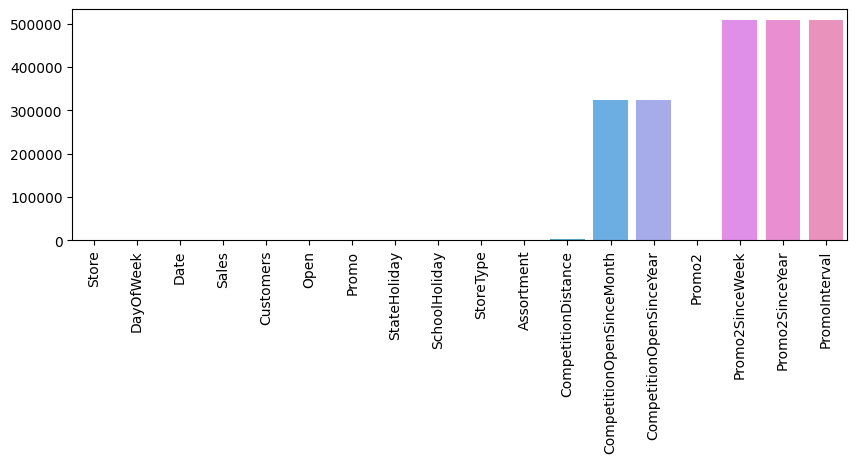

In [8]:
counts = data_train.isnull().sum()
print('Missing value counts:')
print(counts)

plt.figure(figsize=(10, 3))
g = sns.barplot(x=counts.index, y=counts.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

C:\Users\WenBi\AppData\Local\Temp\ipykernel_19824\2623597528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['Sales'].dropna(), bins=20, ax=axes[0][0]);
C:\Users\WenBi\AppData\Local\Temp\ipykernel_19824\2623597528.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['Com

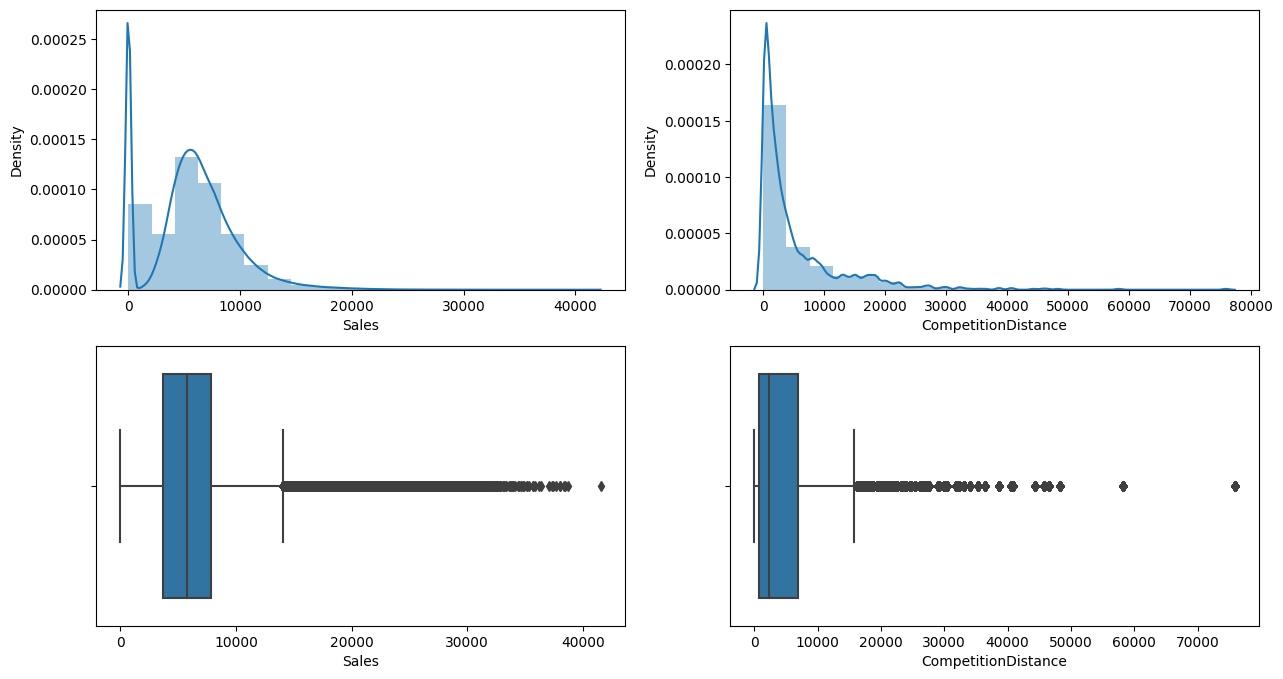

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.distplot(data_train['Sales'].dropna(), bins=20, ax=axes[0][0]);
sns.distplot(data_train['CompetitionDistance'].dropna(), bins=20, ax=axes[0][1]);
sns.boxplot(x=data_train['Sales'].dropna(), ax=axes[1][0])
sns.boxplot(x=data_train['CompetitionDistance'].dropna(), ax=axes[1][1])
plt.show()

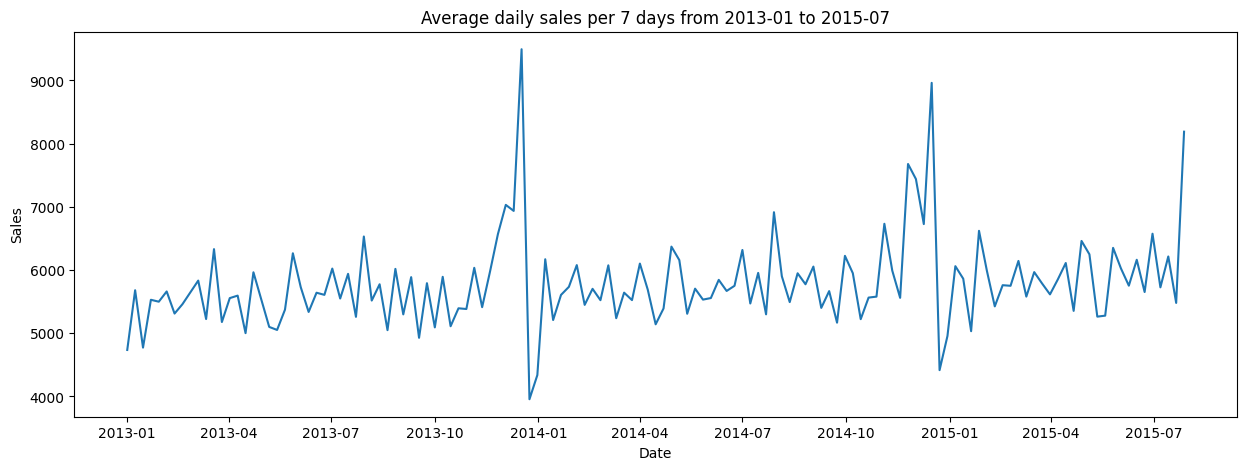

In [11]:
plt.figure(figsize=(15, 5))
data_train_sales = data_train[['Date', 'Sales']]
data_train_sales_1 = data_train_sales.groupby(pd.Grouper(key='Date', freq='7D')).mean()
ax = sns.lineplot(x=data_train_sales_1.index, y=data_train_sales_1['Sales'])
ax.set_title('Average daily sales per 7 days from 2013-01 to 2015-07')
plt.show()

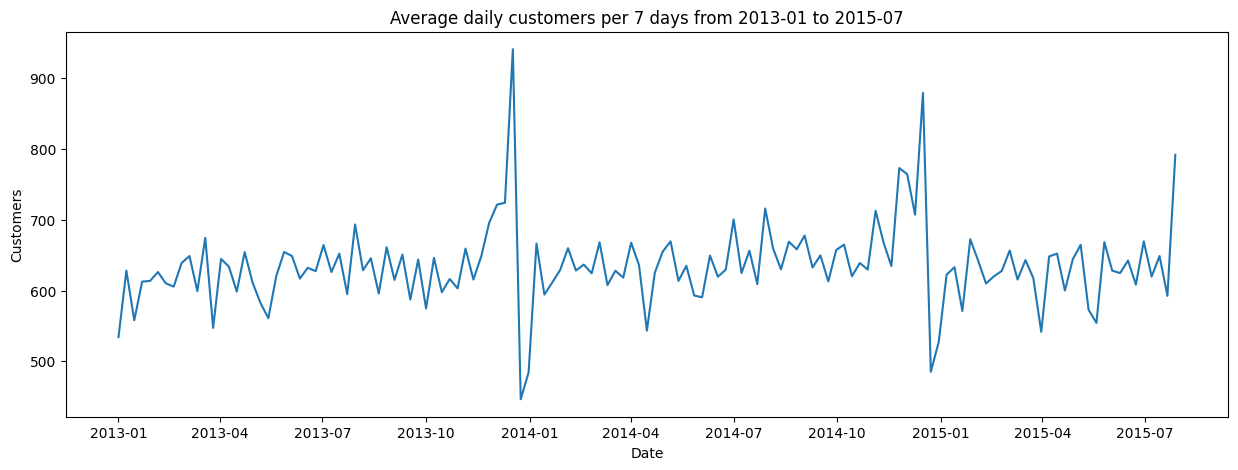

In [12]:
plt.figure(figsize=(15, 5))
data_train_customers = data_train[['Date', 'Customers']]
data_train_customers_1 = data_train_customers.groupby(pd.Grouper(key='Date', freq='7D')).mean()
ax = sns.lineplot(x=data_train_customers_1.index, y=data_train_customers_1['Customers'])
ax.set_title('Average daily customers per 7 days from 2013-01 to 2015-07')
plt.show()

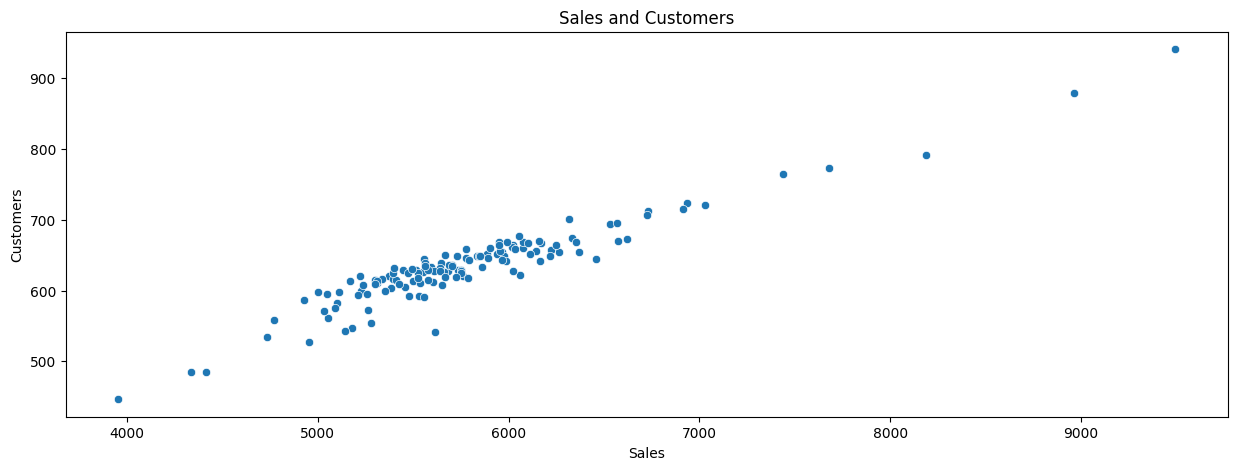

In [13]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=data_train_sales_1['Sales'], y=data_train_customers_1['Customers']).set_title('Sales and Customers')
plt.show()

In [14]:
data_train_open_sl_cstm = data_train[['Sales', 'Customers']]
data_train_open_sl_cstm.corr()

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


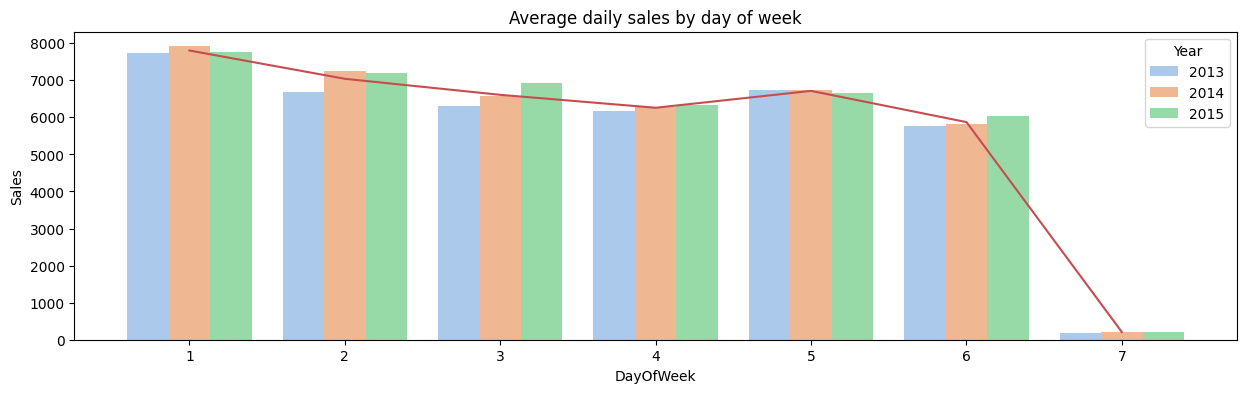

In [15]:
plt.figure(figsize=(15, 4))
data_train_wd = data_train.copy()
data_train_wd['Year'] = data_train_wd['Date'].dt.strftime('%Y')
data_train_wd = data_train_wd.groupby(['Year', 'DayOfWeek']).mean().reset_index()
sns.barplot(x='DayOfWeek', y='Sales', hue='Year', palette='pastel', data=data_train_wd)
data_train_wd = data_train_wd.groupby(['DayOfWeek']).mean().reset_index()
ax = sns.lineplot(x=data_train_wd.index, y=data_train_wd['Sales'], color='#c64d4f')
ax.set_title('Average daily sales by day of week')
ax.legend_.set_title('Year')
plt.show()

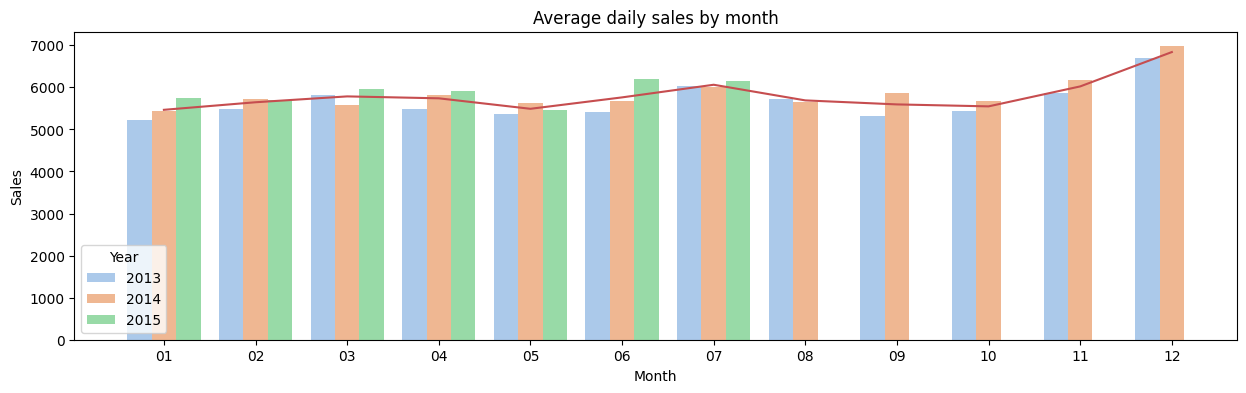

In [16]:
plt.figure(figsize=(15, 4))
data_train_m = data_train.copy()
data_train_m['Year'] = data_train_m['Date'].dt.strftime('%Y')
data_train_m['Month'] = data_train_m['Date'].dt.strftime('%m')
data_train_m = data_train_m.groupby(['Year', 'Month']).mean().reset_index()
sns.barplot(x='Month', y='Sales', hue='Year', palette='pastel', data=data_train_m)
data_train_m = data_train_m.groupby(['Month']).mean().reset_index()
ax = sns.lineplot(x=data_train_m.index, y=data_train_m['Sales'], color='#c64d4f')
ax.set_title('Average daily sales by month')
ax.legend_.set_title('Year')
plt.show()

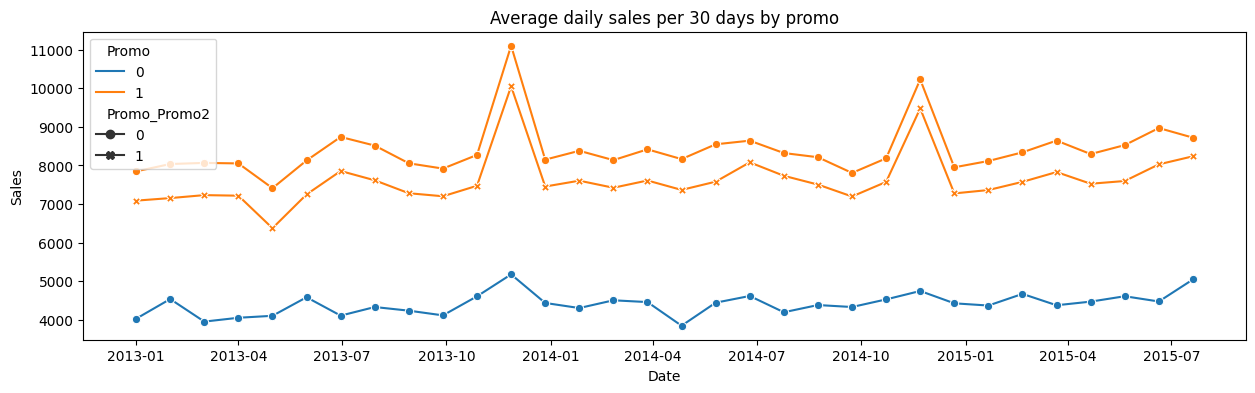

In [18]:
plt.figure(figsize=(15, 4))
data_train_ = data_train.copy()
data_train_ = data_train_[['Sales', 'Date', 'Promo', 'Promo2']]
data_train_['Promo_Promo2'] = data_train_['Promo'].astype(int) & data_train_['Promo2'].astype(int)
data_train_ = data_train_.groupby([pd.Grouper(key='Date', freq='30D'), 'Promo', 'Promo_Promo2']).mean().reset_index()
ax = sns.lineplot(x='Date', y='Sales', hue='Promo', style='Promo_Promo2', data=data_train_, markers=True, dashes=False)
ax.set_title('Average daily sales per 30 days by promo')
plt.show()

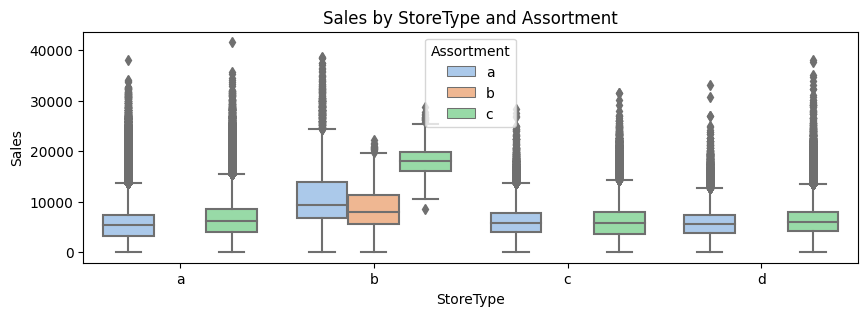

In [19]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x='StoreType', y='Sales', hue='Assortment', palette='pastel', data=data_train)
ax.set_title('Sales by StoreType and Assortment')
plt.show()

In [21]:
from utils import preprocessing, cv, model
import joblib
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

data_train, data_test, data_store = preprocessing.read_csv(['train.csv', 'test.csv', 'store.csv'])
data_train = preprocessing.combine(data_train, data_store)
data_test = preprocessing.combine(data_test, data_store)
(X_train, y_train), X_test = preprocessing.transform(data_train, data_test)

C:\Users\WenBi\AppData\Local\Temp\ipykernel_19824\4017846088.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)
c:\Users\WenBi\Desktop\ML\utils\preprocessing.py:49: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data['Date'].dt.weekofyear
c:\Users\WenBi\Desktop\ML\utils\preprocessing.py:49: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data['Date'].dt.weekofyear


In [22]:
X_train

,Store,DayOfWeek,Year,Month,Day,DayOfYear,WeekOfYear,Quarter,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionOpen,Promo2,Promo2SinceWeek,Promo2SinceYear,Promo2Open,InPromoMonth,MeanLogSalesByStore,MeanLogSalesByDOW,MeanLogSalesByMonth
0,1,4,2015,7,31,212,31,3,1,1,0,1,3,1,1270.0,9.0,2008.0,84.0,0.0,NaN,NaN,0.00,0,8.468023,2.246065,8.847155
1,2,4,2015,7,31,212,31,3,1,1,0,1,1,1,570.0,11.0,2007.0,96.0,1.0,13.0,2010.0,64.50,1,8.508132,2.246065,8.847155
2,3,4,2015,7,31,212,31,3,1,1,0,1,1,1,14130.0,12.0,2006.0,108.0,1.0,14.0,2011.0,52.25,1,8.845571,2.246065,8.847155
3,4,4,2015,7,31,212,31,3,1,1,0,1,3,3,620.0,9.0,2009.0,72.0,0.0,NaN,NaN,0.00,0,9.173614,2.246065,8.847155
4,5,4,2015,7,31,212,31,3,1,1,0,1,1,1,29910.0,4.0,2015.0,3.0,0.0,NaN,NaN,0.00,0,8.450471,2.246065,8.847155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,1,2013,1,1,1,1,1,1,0,1,1,2,1,150.0,9.0,2006.0,84.0,0.0,NaN,NaN,0.00,0,9.324420,2.252147,8.789553
844334,733,1,2013,1,1,1,1,1,1,0,1,1,2,2,860.0,10.0,1999.0,168.0,0.0,NaN,NaN,0.00,0,9.611415,2.252147,8.789553
844335,769,1,2013,1,1,1,1,1,1,0,1,1,2,2,840.0,NaN,NaN,NaN,1.0,48.0,2012.0,0.25,1,9.289789,2.252147,8.789553
844336,948,1,2013,1,1,1,1,1,1,0,1,1,2,2,1430.0,NaN,NaN,NaN,0.0,NaN,NaN,0.00,0,8.845812,2.252147,8.789553


In [23]:
params = {
    'eta': 0.03,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'lambda': 0.2,
    'silent': 1,
    'seed': 12
}

m = model.Model(params, num_boost_round=5000, early_stopping_rounds=50)
m.train(X_train, y_train)

c:\Users\WenBi\anaconda3\envs\vs\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[14:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	eval-rmse:8.03007	eval-rmspe:0.91461	train-rmse:8.02056	train-rmspe:0.91446
[1]	eval-rmse:7.78949	eval-rmspe:0.88717	train-rmse:7.78015	train-rmspe:0.88701
[2]	eval-rmse:7.55587	eval-rmspe:0.86052	train-rmse:7.54699	train-rmspe:0.86038
[3]	eval-rmse:7.32954	eval-rmspe:0.83470	train-rmse:7.32080	train-rmspe:0.83455
[4]	eval-rmse:7.11009	eval-rmspe:0.80966	train-rmse:7.10141	train-rmspe:0.80950
[5]	eval-rmse:6.89797	eval-rmspe:0.78544	train-rmse:6.88878	train-rmspe:0.78518
[6]	eval-rmse:6.69177	eval-rmspe:0.76193	train-rmse:6.68230	train-rmspe:0.76161
[7]	eval-rmse:6.49195	eval-rmspe:0.73915	train-rmse:6.48199	train-rmspe:0.73876
[8]	eval-rmse:6.29757	eval-rmspe:0.71698	train-rmse:6.28776	train-rmspe:0.71658
[9]	eval-rmse:6.10836	eval-rmspe:0.69539	train-rmse:6.09940	train-rmspe:0.69507
[10]

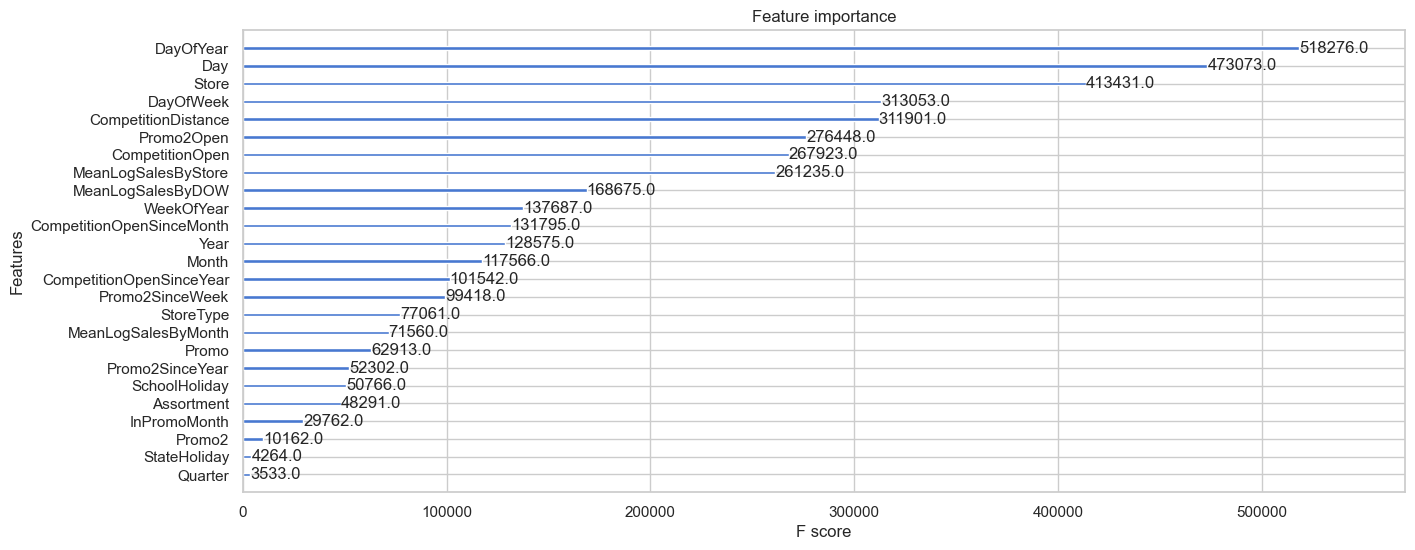

In [26]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', palette='muted')

m.save_model('models/model.joblib.dat')

fig, ax = plt.subplots(figsize=(15, 6))
xgb.plot_importance(m.bst, ax=ax)
plt.show()

Best weight is 1.0, RMSPE is 0.1202


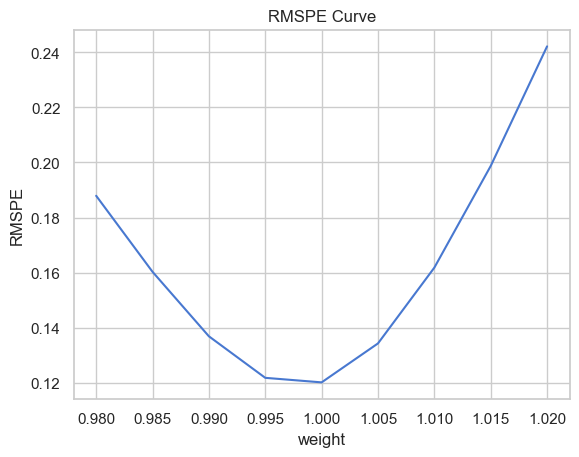

In [27]:
def correction(model, y_train):
    y_true, y_pred = y_train[:41088], model.bst.predict(xgb.DMatrix(X_train[:41088]))
    weights = np.arange(0.98, 1.02, 0.005)
    errors = []
    
    for w in weights:
        error = cv.rmspe(np.expm1(y_true[:41088]), np.expm1(y_pred * w))
        errors.append(error)

    plt.plot(weights, errors)
    plt.xlabel('weight')
    plt.ylabel('RMSPE')
    plt.title('RMSPE Curve')
    
    idx = errors.index(min(errors))
    print('Best weight is {}, RMSPE is {:.4f}'.format(weights[idx], min(errors)))
    
correction(m, y_train)

In [29]:
weight = 1
y_pred = m.predict(X_test, weight=weight)

result = pd.DataFrame({'Id': data_test['Id'], 'Sales': y_pred})
result.to_csv('submission.csv', index=False)

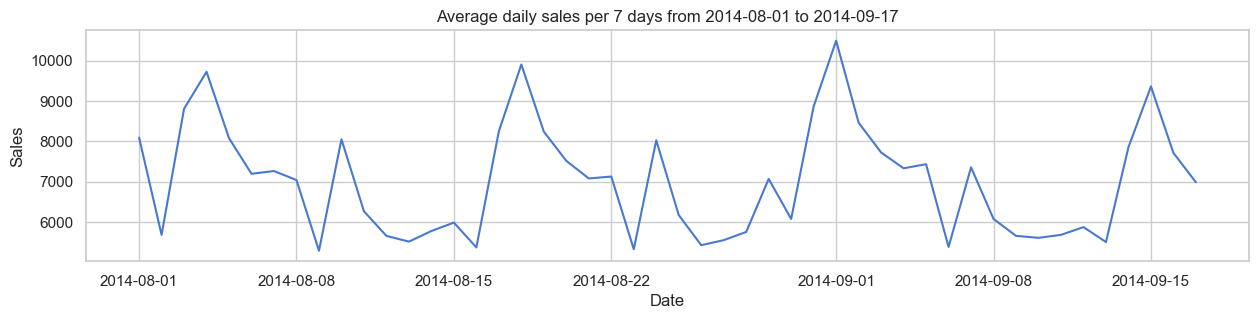

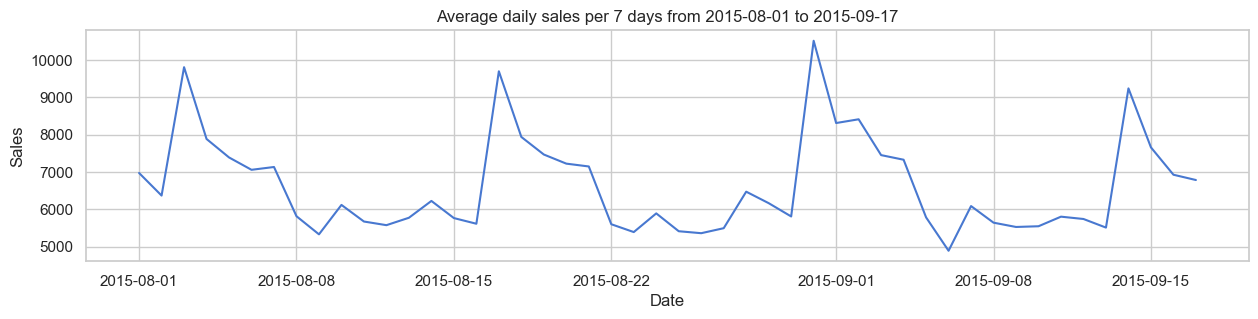

In [30]:
data_train_sales = pd.concat([X_train, np.expm1(y_train * weight)], axis=1)
data_train_sales['Date'] = pd.to_datetime(data_train_sales[['Year', 'Month', 'Day']])
data_train_sales = data_train_sales[(data_train_sales['Date'] >= '2014-08-01') & (data_train_sales['Date'] <= '2014-09-17')]
data_test_sales = pd.concat([X_test, pd.Series(y_pred, name='Sales')], axis=1)
data_test_sales['Date'] = pd.to_datetime(data_test_sales[['Year', 'Month', 'Day']])
data_train_sales_1 = data_train_sales.groupby(pd.Grouper(key='Date', freq='D')).mean()
data_test_sales_1 = data_test_sales.groupby(pd.Grouper(key='Date', freq='D')).mean()

plt.figure(figsize=(15, 3))
sns.lineplot(x=data_train_sales_1.index, y=data_train_sales_1['Sales']).set_title('Average daily sales per 7 days from 2014-08-01 to 2014-09-17')
plt.show()
plt.figure(figsize=(15, 3))
sns.lineplot(x=data_test_sales_1.index, y=data_test_sales_1['Sales']).set_title('Average daily sales per 7 days from 2015-08-01 to 2015-09-17')
plt.show()